<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CIS9650/blob/main/BS4_W3Schools_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautiful Soup (BS4) - W3Schools Example  
  
*by Professor Patrick, 2024.*  

## `w3schools.com` Example - Introduction  

This notebook demonstrates how to use **Beautiful Soup** (BS4) to scrape data from the **W3Schools** HTML tutorial page. We'll fetch the HTML content, parse it, and extract specific elements like the title, headings, links, and specific sections.  

Beautiful Soup is a Python library used to scrape and parse **HTML** or **XML** documents. It allows users to navigate and search for specific elements in a webpage's structure.


We will look at the **HTML** on the web page at https://www.w3schools.com/html/  

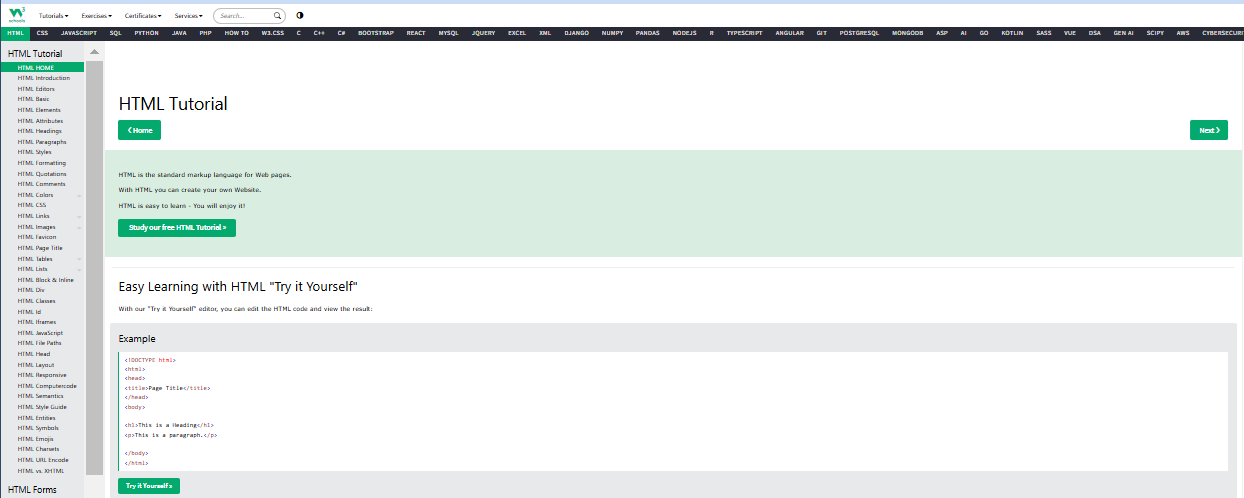

You can use the **Developer's Tools** menu choice in Chrome or a comparable facility in your browser to view the **HTML** in the web page online.  

## Getting Started with Beautiful Soup   
  
### Key Features:  
- Fetch content from web pages using HTTP requests.  
- Parse and search HTML or XML documents.  
- Extract structured data like headings, links, and tables.  

### Practical Exercises:
- Practice exercisings accessing and analyzing data
   

### Ethical Considerations:
- Always check the website's Terms of Service before scraping.  
- Avoid sending too many requests in a short period to prevent overloading servers.  



---



## Housekeeping: Importing Libraries  
  

In [ ]:
# Step 0: Importing Required Libraries

# BeautifulSoup: For parsing HTML content
from bs4 import BeautifulSoup

# requests: For sending HTTP requests to fetch webpage content
import requests

## Fetching the Webpage  

We send a `GET` request to the URL and check the HTTP response code to ensure the page was fetched successfully.

In [ ]:
# Step 1: Sending a Request to the URL
url = "https://www.w3schools.com/html/"

# Using try/except to deal with error handling in opening the web page
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an HTTPError for bad responses
except requests.exceptions.RequestException as e:
    print(f"Error fetching the page: {e}")


# Checking the Response
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

## Parsing and Exploring the Page Title  
  
We use Beautiful Soup to parse the HTML and extract the title of the page.  

In [ ]:
# Step 2: Parsing the HTML Content
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Exploring the Page Title
page_title = soup.title.string
print("Page Title:", page_title)

## Extracting Headings  
  
Using the find_all method, we extract all headings (h1, h2, and h3) and print them with their respective tag names.

In [ ]:
# Step 4: Extracting All Headings
headings = soup.find_all(['h1', 'h2', 'h3'])
print(f"Captured {len(headings)} Headings as a {type(headings)} named 'headings'.")
print("\nAll Headings on the Page:")
for heading in headings:
    print(f"{heading.name}: {heading.text.strip()}")

## Wrangling Results to a Dictionary  
  
The following Python code creates a `headings_dict` dictionary with `headingTag` and `headingName` lists (arrays) for every element of the `headings` bs4.element.ResultSet:

In [ ]:
# Step 5: Create a dictionary to store headings
headings_dict = {
    "headingTag": [],
    "headingName": []
}

# Populate the dictionary
for heading in headings:
    headings_dict["headingTag"].append(heading.name)  # Add the heading tag type (e.g., h1, h2)
    headings_dict["headingName"].append(heading.text.strip())  # Add the text of the heading

# Display the dictionary
print("Headings Dictionary:")
print(headings_dict)


## Extracting Valid Links  
  
The following code extracts valid links by:
- extracting all anchor tags (`<a>`)
- filtering them for valid links using `href`
- further filtering out any that invoke JavaScript code
- then printing the text and URL for the first 10 valid links.  

In [ ]:
# Step 6: Extracting Links
links = soup.find_all('a', href=True)
# Extracting and Filtering Valid Links
valid_links = []

for link in links:
    href = link.get('href', '')
    # Check if the href is a valid URL (not empty, not starting with "javascript:")
    if href and not href.startswith('javascript:'):
        valid_links.append({
            "text": link.text.strip(),
            "url": href
        })

print(f"Captured {len(valid_links)} valid Links as a {type(valid_links)} named 'valid_links'.")

print("\nThe first 10 Links on the Page:")
for valid_link in valid_links[:10]:  # Limiting to the first 10 valid links for readability
    print(f"Text: {valid_link['text']}, URL: {valid_link['url']}")

## Extracting a Specific Section  
  
We target a specific section of the page using its id attribute (main) and extract its content, limiting the output to 500 characters for readability.  

In [ ]:
# Step 7: Extracting a Specific Section
tutorial_section = soup.find('div', {'id': 'main'})
if tutorial_section:
    print("\nStart of Main Tutorial Section Content:")
    print(tutorial_section.text.strip()[:500])  # Displaying the first 500 characters
else:
    print("Main Tutorial Section not found.")

So far, we provided an overview of scraping content using **Beautiful Soup**, focusing on the title, headings, links, and specific page sections.   
  
Modify the code to explore additional elements or extract deeper insights. Try the following exercises --



---



## Exercises for Practice  

Try solving these tasks to deepen your understanding:  

1. Extract all paragraph (`<p>`) tags from the webpage.
2. Count how many valid links are present on the page.
3. Extract and display only external links (those starting with `http`).  

---

In [ ]:
# Your code here



---




## Summary  

In this notebook, we covered:  

- Fetching web content using `requests`.
- Parsing HTML with Beautiful Soup.
- Extracting specific elements (title, headings, links).
- Organizing data into structured formats like tables.

Beautiful Soup is a powerful tool for web scraping and parsing, but always remember to scrape ethically and respect website policies.

---  
*End of Notebook*